## This is just a dummy notebook to understand the steps of logistics regression

##### I do not take credit or seek credit for the code below. Please feel free to edit and share. Suggestions are most welcome.

###### Edited by: Ishan Anant Karve. Apr 2022

In [69]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [70]:
# Reading csv file
df = pd.read_csv("test_dataset.csv")
#the only thing I know about this data set is that Class is the dependent variable

In [71]:
# Displaying first 5 records of the dataset
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1


In [72]:
# Checking number of rows and columns in the dataset
df.shape

(1941, 34)

In [73]:
# Checking datatypes of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

In [74]:
# Checking for any null/missing values in the dataset
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
Class    0
dtype: int64

In [75]:
df.nunique()

V1        962
V2        994
V3       1939
V4       1940
V5        920
V6        399
V7        317
V8       1909
V9        161
V10       100
V11        84
V12         2
V13         2
V14        24
V15      1387
V16      1338
V17       770
V18       454
V19       818
V20       648
V21         3
V22       914
V23       183
V24       217
V25       918
V26      1522
V27       388
V28         2
V29         2
V30         2
V31         2
V32         2
V33         2
Class       2
dtype: int64

In [76]:
# Summary of all numerical columns in the dataset
df.Class.describe()

count    1941.000000
mean        1.346728
std         0.476051
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Class, dtype: float64

In [77]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'Class'],
      dtype='object')

In [78]:
df.drop(['V30'],axis=1, inplace=True)

## Building the model into training and testing sets

In [79]:
X = df.drop(['Class'], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V31,V32,V33
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0


In [80]:
y = df['Class']
y.describe()

count    1941.000000
mean        1.346728
std         0.476051
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Class, dtype: float64

In [81]:
class_map={1:0,2:1}
y=y.map(class_map)
y.value_counts()

0    1268
1     673
Name: Class, dtype: int64

In [82]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [83]:
X_train.shape

(1358, 32)

In [84]:
X_test.shape

(583, 32)

### Rescaling the features


In [85]:
# Instantiate an object
scaler = StandardScaler()

#create a list of numeric vars
#excluding columns whose value range is binary
num_vars = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V14","V15","V16","V17","V18","V19","V20","V22","V23","V24","V25","V26","V27"]
#num_vars=X_train.columns.tolist()

# Fit on data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V31,V32,V33
1208,0.949197,0.939316,0.715222,0.715207,-0.435549,-0.350222,-0.448661,-0.425239,-0.081377,-0.737686,...,-0.017069,-0.485449,-0.735717,-0.887513,-0.172015,0,0,0,0,1
1264,1.030041,1.001716,1.281368,1.281357,-0.436311,-0.454504,-0.440180,-0.421382,0.477067,-0.163841,...,-0.678804,-0.118059,0.929080,0.063658,-0.626041,0,0,0,0,1
549,-1.008400,-0.904518,-0.762518,-0.762517,0.476140,0.416254,0.170450,0.404082,-1.477487,-0.216008,...,1.552445,0.610316,-1.394945,-0.377129,1.231391,0,0,0,0,0
917,-0.084461,-0.159738,1.035570,1.035558,-0.426661,-0.428433,-0.431699,-0.413148,0.197845,-0.163841,...,-0.516143,-0.118059,0.746996,-0.131216,-0.419985,0,0,0,0,1
1552,-1.064221,-1.190353,-0.429023,-0.429041,-0.448247,-0.506645,-0.533470,-0.431552,0.818338,0.514340,...,-0.772868,-0.783029,0.200744,0.635024,-1.098533,0,0,0,0,0


In [86]:
### Checking the Churn Rate
churn = (sum(df['Class'])/len(df['Class'].index))*100
churn

134.67284904688307

### Building regression model

In [87]:
#create a function to undertake logistics regression and undertake analysis
def logistic_regression(df_indices,df_Xtrain,df_ytrain):
    #undertake regression
    X_train_lm = df_Xtrain[df_indices]
    X_train_lm = sm.add_constant(X_train_lm)
    lr_results = sm.GLS(df_ytrain, X_train_lm, family = sm.families.Binomial()).fit() #create model
    #calculate VIF
    vif = pd.DataFrame()
    vif['varname'] = X_train_lm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False) 
    vif=vif.set_index('varname')#change df index to varname
    #process lr summary results
    df_lr_sum=get_coef_table(lr_results)#This works better :-)!
    df_lr_sum.set_index('varname')#change df index to varname
    df_lr_sum = df_lr_sum.sort_values(by=['pvalue'], ascending=False)#sort the dataframe by p value and in descending order
    #to undertake holistic analysis look at VIF and P values
    lr_sum=df_lr_sum.merge(vif, on='varname', how='left')#join both dataframes 
    lr_sum=lr_sum.set_index('varname')
    return lr_results, vif, lr_sum

In [88]:
 #Obtain regression model coefficients from statsmodels 
 #Reference: https://gist.github.com/zhiyzuo/972b8b95e115c44d6805c929b7b4e2ca
def get_coef_table(lin_reg):
    ''' lin_reg is a fitted statsmodels regression model
    Return a dataframe containing coefficients, pvalues, and the confidence intervals
    '''
    err_series = lin_reg.params - lin_reg.conf_int()[0]
    coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                            'ci_err': err_series.values[1:],
                            'pvalue': lin_reg.pvalues.round(4).values[1:],
                            'varname': err_series.index.values[1:]
                           })
    return coef_df

In [89]:
def iterate_recursion(feature_index,Xtrain,ytrain):
    lr,vif,lr_summary =logistic_regression(feature_index,Xtrain,ytrain)
    #print ("Length of index is {}\n\r".format(len(feature_index)))
    lr_summary.sort_values(by=['VIF'], ascending=False, inplace=True)#sort the dataframe by vif and in descending order
    ##testing recursive modelling to save time
    lr_summary=lr_summary.reset_index()
    print(lr_summary)
    top_feature=lr_summary.varname.iloc[0]
    feature_pvalue=lr_summary.pvalue.iloc[0]
    feature_vif=lr_summary.VIF.iloc[0]
    if (feature_vif>=4.99):
        #print("VIF of {} is {}(>4)".format(top_feature,feature_vif))
        #print("dropping feature {} and redoing regression..".format(top_feature))
        #drop feature from index
        feature_index=feature_index.drop(top_feature)
        #recurse regression
        lr,vif,lr_summary,feature_index=iterate_recursion(feature_index,Xtrain,ytrain)
    
    lr_summary.sort_values(by=['pvalue'], ascending=False, inplace=True)#sort the dataframe by vif and in descending order
    ##testing recursive modelling to save time
    top_feature=lr_summary.varname.iloc[0]
    feature_pvalue=lr_summary.pvalue.iloc[0]
    if (feature_pvalue>=0.05):
        #print("p value of {} is {}(>0.05)".format(top_feature,feature_pvalue))
        #print("dropping feature {} and redoing regression..".format(top_feature))
        #drop feature from index
        feature_index=feature_index.drop(top_feature)
        #recurse regression
        lr,vif,lr_summary,feature_index=iterate_recursion(feature_index,Xtrain,ytrain)
    print ("Final feature count is {}".format(len(feature_index)))
    return lr,vif,lr_summary,feature_index



In [90]:
iv=X_train.columns
regression_summary,VIF,feature_summary,feature_list =iterate_recursion(iv,X_train,y_train)
print (VIF)

   varname         coef       ci_err  pvalue           VIF
0      V13     0.264719     0.017577  0.0000           inf
1      V12     0.321291     0.019537  0.0000           inf
2       V3 -3156.704917  1450.846501  0.0000  2.167526e+10
3       V4  3156.715885  1450.845117  0.0000  2.167521e+10
4       V1     0.037324     1.930153  0.9697  3.836232e+04
5       V2    -0.020307     1.845134  0.9828  3.505720e+04
6      V22     0.360113     0.355190  0.0469  1.299100e+03
7      V18     0.072805     0.313509  0.6488  1.012100e+03
8      V23    -0.087759     0.230318  0.4549  5.462300e+02
9      V24    -0.743938     0.212714  0.0000  4.659200e+02
10      V8     0.417508     0.168098  0.0000  2.909700e+02
11      V5    -0.460350     0.164481  0.0000  2.785800e+02
12      V7     0.218219     0.103507  0.0000  1.103200e+02
13      V6    -0.229250     0.078612  0.0000  6.363000e+01
14     V25     0.365144     0.062640  0.0000  4.040000e+01
15     V16     0.106132     0.052600  0.0001  2.849000e+

   varname      coef    ci_err  pvalue    VIF
0       V6 -0.226795  0.064090  0.0000  40.90
1       V7  0.341904  0.054395  0.0000  29.46
2      V24 -0.464756  0.048983  0.0000  23.89
3       V5 -0.072110  0.042088  0.0008  17.64
4      V25  0.278481  0.040531  0.0000  16.36
5      V26 -0.130226  0.030148  0.0000   9.05
6      V27  0.150226  0.029912  0.0000   8.91
7      V20  0.009567  0.027554  0.4959   7.56
8       V9  0.084650  0.026735  0.0000   7.12
9      V18  0.056602  0.025656  0.0000   6.55
10     V19 -0.014478  0.023551  0.2280   5.52
11     V10  0.036110  0.021990  0.0013   4.81
12     V21 -0.143553  0.044757  0.0000   4.67
13     V12  0.063297  0.030585  0.0001   2.23
14     V16  0.059575  0.014936  0.0000   2.22
15     V17 -0.029313  0.014054  0.0000   1.97
16     V29 -0.903716  0.045951  0.0000   1.73
17     V11  0.014228  0.013011  0.0321   1.69
18     V31 -1.064233  0.065169  0.0000   1.64
19     V33 -0.900224  0.030222  0.0000   1.48
20     V28 -0.947827  0.043305  0.

In [91]:
X_train_lg = X_train[feature_list]
X_train_lg = sm.add_constant(X_train_lg)
lg_final = sm.GLM(y_train, X_train_lg, family = sm.families.Binomial()).fit()
y_train_pred = lg_final.predict(X_train_lg).values.reshape(-1)
lg_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1358
Model:                            GLM   Df Residuals:                     1338
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.374
Date:                Sat, 23 Apr 2022   Deviance:                       184.75
Time:                        16:50:05   Pearson chi2:                 2.44e+03
No. Iterations:                    30   Pseudo R-squ. (CS):             0.6875
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.9215   5.44e+04      0.001      0.999   -1.07e+05    1.07e+05
V2             0.9321      0.326      2.860      0.004       0.293       1.571
V4             0.1397      0.200      0.699      0.484      -0.252       0.531
V9             0.2163      0.299      0.723      0.470      -0.370       0.803
V10           -1.1327      0.265     -4.267      0.000      -1.653      -0.612
V11            0.1029      0.416      0.247      0.805      -0.713       0.919
V12          138.7973   1.14e+06      0.000      1.000   -2.23e+06    2.23e+06
V14          105.3624    7.7e+04      0.001      0.999   -1.51e+05    1.51e+05
V15            0.3571      0.305      1.172      0.241      -0.240       0.954
V16            1.0215      0.279      3.665      0.000       0.475       1.568
V17           -0.9877      0.263     -3.757      0.000      -1.503      -0.472
V18           -2.5435      0.629     -4.046      0.000      -3.776      -1.311
V20           -0.0928      0.410     -0.226      0.821      -0.895       0.710
V21            0.1972      0.484      0.407      0.684      -0.752       1.146
V27           -0.8877      0.396     -2.242      0.025      -1.664      -0.112
V28         -506.1292   3.66e+05     -0.001      0.999   -7.17e+05    7.16e+05
V29         -286.4915   1.93e+05     -0.001      0.999   -3.79e+05    3.78e+05
V31         -286.2197   1.21e+06     -0.000      1.000   -2.38e+06    2.38e+06
V32         -228.0774   1.23e+06     -0.000      1.000   -2.41e+06     2.4e+06
V33         -499.6976   3.55e+05     -0.001      0.999   -6.96e+05    6.95e+05
==============================================================================
"""

In [92]:
y_train_pred_final = pd.DataFrame({'Class':y_train.values, 'Class_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Class,Class_Prob,ID
0,0,4.676062e-122,1208
1,0,1.108456e-22,1264
2,0,4.619684e-02,549
3,0,3.637277e-139,917
4,1,5.817111e-01,1552


In [93]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Class_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Class,Class_Prob,ID,predicted
0,0,4.676062e-122,1208,0
1,0,1.108456e-22,1264,0
2,0,4.619684e-02,549,0
3,0,3.637277e-139,917,0
4,1,5.817111e-01,1552,1


In [94]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.predicted))

0.9683357879234168


In [95]:
def get_confusion_matrix_parameters(y_sample_value,y_predicted_value):
    confusion = metrics.confusion_matrix(y_sample_value, y_predicted_value)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    sensitivity = TP / float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP/ float(TN+FP)
    PPR = TP / float(TP+FP)
    NPR = TN / float(TN+ FN)
    recall = TP/ float(TP+FN)
    return confusion,TP,TN,FP,FN,sensitivity,specificity,FPR,PPR,NPR,recall

In [96]:
def print_matrix_parameters(y_sample_value,y_predicted_value):
    confusion,TP,TN,FP,FN,sensitivity,specificity,FPR,PPR,NPR,recall=get_confusion_matrix_parameters(y_sample_value,y_predicted_value)
    print ("Actual\Predicted\t\t Positive\t\tNegative")
    print ("Actual Positive\t\t\t {}\t\t\t{}".format(TP,FN))
    print ("Actual Negative\t\t\t {}\t\t\t{}".format(FP,TN))
    print("\n")
    print ("Sensitivity = {}\nSpecificity = {}".format(round(sensitivity,2),round(specificity,2)))
    print ("False Positive Rate = {}".format(round(FPR,2)))
    print ("Positive Predictive Value/Precision = {}\nNegative Predictive Value = {}".format(round(PPR,2),round(NPR,2)))
    print ("Recall = {}".format(round(recall,2)))

In [97]:
print_matrix_parameters(y_train_pred_final.Class, y_train_pred_final.predicted)

Actual\Predicted		 Positive		Negative
Actual Positive			 475			5
Actual Negative			 38			840


Sensitivity = 0.99
Specificity = 0.96
False Positive Rate = 0.04
Positive Predictive Value/Precision = 0.93
Negative Predictive Value = 0.99
Recall = 0.99


### Plot ROC Curve

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Class, y_train_pred_final.Class_Prob, drop_intermediate = False )

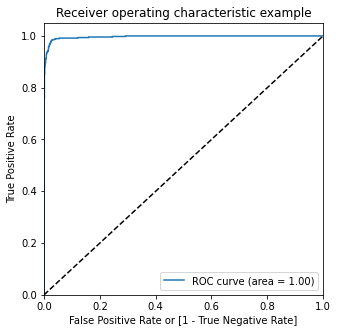

In [100]:
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_Prob)

### Finding Optimal Cutoff Point

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,4.676062e-122,1208,0,1,0,0,0,0,0,0,0,0,0
1,0,1.108456e-22,1264,0,1,0,0,0,0,0,0,0,0,0
2,0,4.619684e-02,549,0,1,0,0,0,0,0,0,0,0,0
3,0,3.637277e-139,917,0,1,0,0,0,0,0,0,0,0,0
4,1,5.817111e-01,1552,1,1,1,1,1,1,1,0,0,0,0


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.353461  1.000000  0.000000
0.1   0.1  0.954345  0.991667  0.933941
0.2   0.2  0.968336  0.989583  0.956720
0.3   0.3  0.974963  0.983333  0.970387
0.4   0.4  0.975700  0.975000  0.976082
0.5   0.5  0.975700  0.966667  0.980638
0.6   0.6  0.970545  0.941667  0.986333
0.7   0.7  0.969072  0.929167  0.990888
0.8   0.8  0.965390  0.916667  0.992027
0.9   0.9  0.956554  0.881250  0.997722


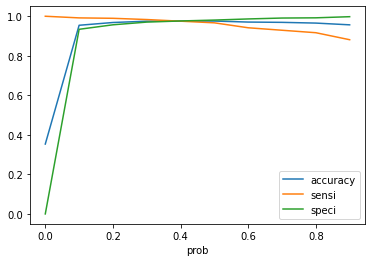

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Class,Class_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,4.676062e-122,1208,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.108456e-22,1264,0,1,0,0,0,0,0,0,0,0,0,0
2,0,4.619684e-02,549,0,1,0,0,0,0,0,0,0,0,0,0
3,0,3.637277e-139,917,0,1,0,0,0,0,0,0,0,0,0,0
4,1,5.817111e-01,1552,1,1,1,1,1,1,1,0,0,0,0,1


In [105]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)

0.975699558173785

In [106]:
print_matrix_parameters(y_train_pred_final.Class, y_train_pred_final.predicted)

Actual\Predicted		 Positive		Negative
Actual Positive			 475			5
Actual Negative			 38			840


Sensitivity = 0.99
Specificity = 0.96
False Positive Rate = 0.04
Positive Predictive Value/Precision = 0.93
Negative Predictive Value = 0.99
Recall = 0.99


### Precision and recall tradeoff

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Class, y_train_pred_final.Class_Prob)

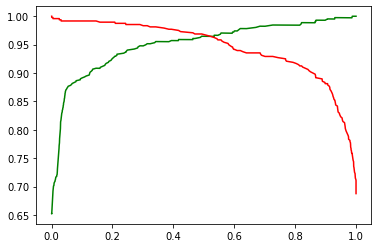

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [109]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [110]:
X_test = X_test[feature_list]
X_test.head()

,V2,V4,V9,V10,V11,V12,V14,V15,V16,V17,V18,V20,V21,V27,V28,V29,V31,V32,V33
483,-0.868286,0.082316,-1.508512,0.566508,-0.402004,0,-0.707437,-0.922236,0.699628,1.478013,1.218572,-1.790259,1.0,1.231391,0,0,0,0,0
1884,1.700199,1.962181,0.942437,0.670844,1.337839,1,-0.183146,-0.374198,0.922715,-0.453760,-0.350396,-0.512710,0.0,-0.800441,0,0,0,0,0
201,-1.226585,-0.546876,-1.043142,-1.937544,-0.694297,1,-0.165067,-1.107353,0.760337,-1.681329,-0.379451,0.798503,1.0,1.231098,0,1,0,0,0
1846,-0.465702,-0.821864,2.369572,2.340212,-0.729094,0,0.377302,0.769404,0.287098,-0.637914,-0.426262,0.634441,1.0,-0.486814,0,0,0,0,0
427,-0.832053,-0.354993,-1.942857,0.566508,-0.415922,0,-0.707437,-0.940847,0.638187,1.487589,1.475224,-1.905741,0.0,1.231391,0,0,0,0,0


In [111]:
X_test_sm = sm.add_constant(X_test)

In [112]:
y_test_pred = lg_final.predict(X_test_sm)

In [113]:
y_test_pred[:10]

483      4.837504e-03
1884     1.000000e+00
201      2.854782e-38
1846     1.000000e+00
427      1.713740e-03
241      7.194594e-39
1005    1.183626e-105
1809     1.000000e+00
1426     1.000000e+00
107     7.395063e-149
dtype: float64

In [114]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [115]:
# Let's see the head
y_pred_1.head()

,0
483,4.837504e-03
1884,1.000000e+00
201,2.854782e-38
1846,1.000000e+00
427,1.713740e-03


In [116]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [117]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [118]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [120]:
y_pred_final.head()

,Class,ID,0
0,0,483,4.837504e-03
1,1,1884,1.000000e+00
2,0,201,2.854782e-38
3,1,1846,1.000000e+00
4,0,427,1.713740e-03


In [121]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Class_Prob'})

In [122]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Class','Class_Prob'], axis=1)

In [123]:
# Let's see the head of y_pred_final
y_pred_final.head(20)

,ID,Class,Class_Prob
0,483,0,4.837504e-03
1,1884,1,1.000000e+00
2,201,0,2.854782e-38
3,1846,1,1.000000e+00
4,427,0,1.713740e-03
5,241,0,7.194594e-39
6,1005,0,1.183626e-105
7,1809,1,1.000000e+00
8,1426,1,1.000000e+00
9,107,0,7.395063e-149


In [124]:
y_pred_final['final_predicted'] = y_pred_final.Class_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [125]:
y_pred_final.head(20)

,ID,Class,Class_Prob,final_predicted
0,483,0,4.837504e-03,0
1,1884,1,1.000000e+00,1
2,201,0,2.854782e-38,0
3,1846,1,1.000000e+00,1
4,427,0,1.713740e-03,0
5,241,0,7.194594e-39,0
6,1005,0,1.183626e-105,0
7,1809,1,1.000000e+00,1
8,1426,1,1.000000e+00,1
9,107,0,7.395063e-149,0


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.final_predicted)

0.9622641509433962

In [127]:
print_matrix_parameters(y_pred_final.Class, y_pred_final.final_predicted)

Actual\Predicted		 Positive		Negative
Actual Positive			 189			4
Actual Negative			 18			372


Sensitivity = 0.98
Specificity = 0.95
False Positive Rate = 0.05
Positive Predictive Value/Precision = 0.91
Negative Predictive Value = 0.99
Recall = 0.98


In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Class, y_pred_final.final_predicted, drop_intermediate = False )

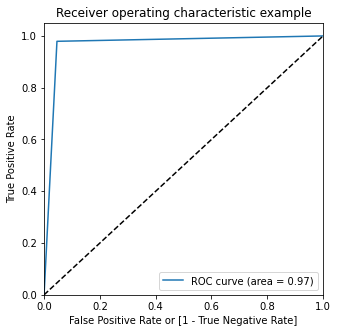

In [129]:
draw_roc( y_pred_final.Class, y_pred_final.final_predicted)

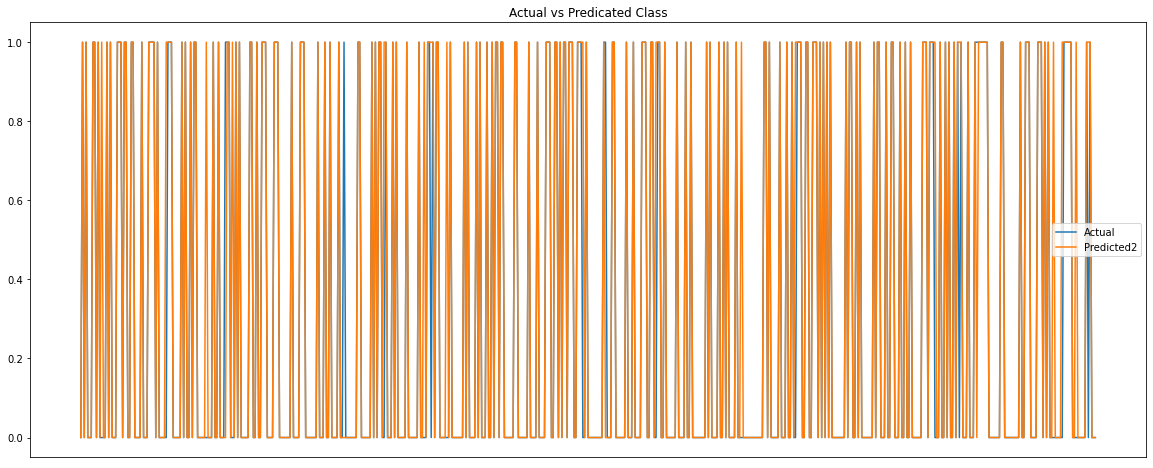

In [130]:
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1, = ax.plot(range(len(y_pred_final.Class)),y_pred_final.Class)
l2, = ax.plot(range(len(y_pred_final.final_predicted)),y_pred_final.final_predicted)
plt.legend([l1,l2],['Actual','Predicted2'])
plt.title('Actual vs Predicated Class');
plt.xticks([])
plt.show()

In [131]:
y_pred_final[y_pred_final['Class']!=y_pred_final['final_predicted']].count()

ID                 22
Class              22
Class_Prob         22
final_predicted    22
dtype: int64